<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/14-2-Perceptron-Multicapa-Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Perceptrón Multicapa: Clasificación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; Periodo 2025-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado como una guía introductoria para implementar un perceptrón multicapa en un problema de clasificación. Se utilizará la librería `scikit-learn` mediante la API de `Keras`.




Los paquetes necesarios son:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_circles, make_blobs

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy


In [2]:
# Fijar las semillas para reproducibilidad
import random
import os
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.config.experimental.enable_op_determinism()
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
    os.environ["TF_DETERMINISTIC_OPS"] = "1"

---
## <font color='264CC7'> Ejemplo 1</font>

Generamos datos:

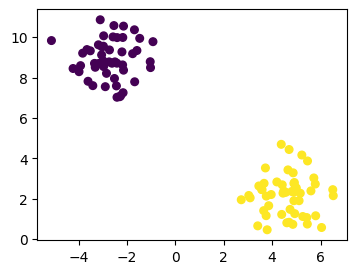

In [3]:
# Generamos los datos
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)

# Visualizar los datos
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
plt.show()

### <font color='264CC7'> Definición de la red </font>

Generemos una red de una solo neurona con una sola capa oculta.

In [4]:
# Creamos el modelo
set_seed(42)
model = Sequential([
    Input(shape=(2,)),
    Dense(1, activation='sigmoid')
])
# Compilamos el modelo
optimizer = SGD(learning_rate=0.1)
loss = BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss)
# Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

### <font color='264CC7'> Entrenamiento </font>

Entrenamos la red:

In [5]:
# Entrenar el modelo
history = model.fit(X, y, epochs=20, verbose=0)

# Visualizo los parámetros
print("w =", model.get_weights()[0])
print("b =", model.get_weights()[1])

w = [[ 1.3758898]
 [-0.2521127]]
b = [-0.0438058]


Visualicemos el entrenamiento:

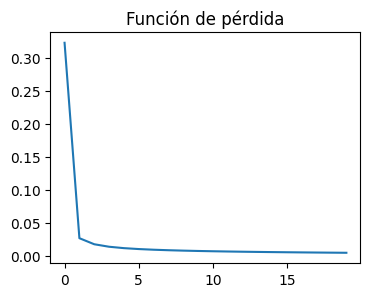

In [6]:
# Visualizar la evolución de la función de pérdida
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'])
plt.title('Función de pérdida')
plt.show()

Visualizo los resultados:

536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


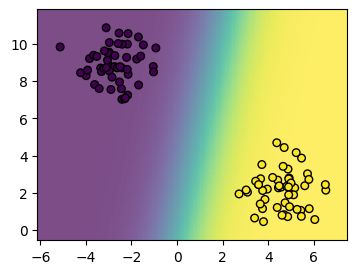

In [7]:
# Datos para el fondo
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                         np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Crear el fondo
Z = Z.reshape(xx.shape)
plt.figure(figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, alpha=0.7)

# Puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

---
## <font color='264CC7'> Ejemplo 2</font>

Generamos datos:

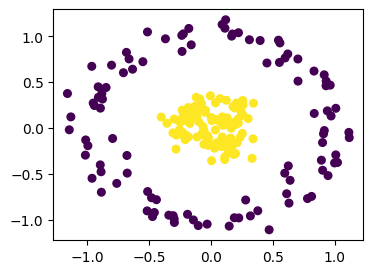

In [8]:
# Generamos los datos
X, y = make_circles(n_samples=200, noise=0.1, factor=0.2, random_state=42)

# Visualizar los datos
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
plt.show()

### <font color='264CC7'> Definición de la red </font>

Generemos una red de una solo neurona con una sola capa oculta.

In [20]:
# Creamos el modelo
set_seed(42)
model = Sequential([
    Input(shape=(2,)),
    Dense(1, activation='sigmoid')
])
# Compilamos el modelo
optimizer = SGD(learning_rate=0.1)
loss = BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss)
# Resumen del modelo
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

### <font color='264CC7'> Entrenamiento </font>

Entrenamos la red y visualizamos el entrenamiento:

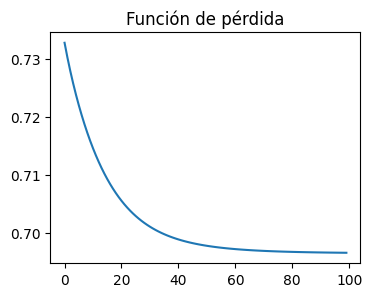

In [21]:
# Entrenar el modelo
history = model.fit(X, y, epochs=100, verbose=0)

# Visualizar la evolución de la función de pérdida
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'])
plt.title('Función de pérdida')
plt.show()

Visualizo los resultados:

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


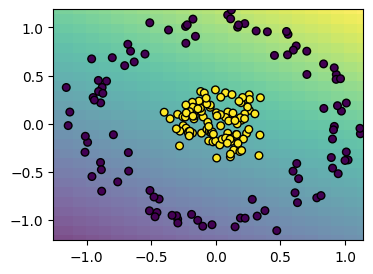

In [22]:
# Datos para el fondo
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                         np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Crear el fondo
Z = Z.reshape(xx.shape)
plt.figure(figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, alpha=0.7)

# Puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### <font color='264CC7'> Definición de otra red </font>

Generemos una red de una capa oculta.

In [23]:
# Creamos el modelo
set_seed(42)
model = Sequential([
    Input(shape=(2,)),
    Dense(4, activation='tanh'),
    Dense(1, activation='sigmoid')
])
# Compilamos el modelo
optimizer = SGD(learning_rate=0.5)
loss = BinaryCrossentropy
model.compile(optimizer=optimizer, loss=loss)
# Resumen del modelo
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

### <font color='264CC7'> Entrenamiento </font>

Entrenamos la red:

In [24]:
# Entrenar el modelo
history = model.fit(X, y, epochs=200, verbose=0)

Visualicemos el entrenamiento:

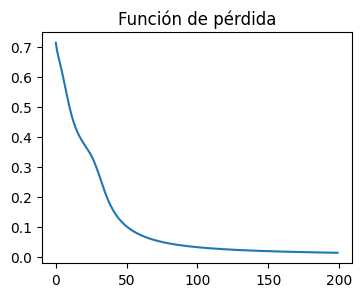

In [25]:
# Visualizar la evolución de la función de pérdida
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'])
plt.title('Función de pérdida')
plt.show()

Visualizo los resultados:

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


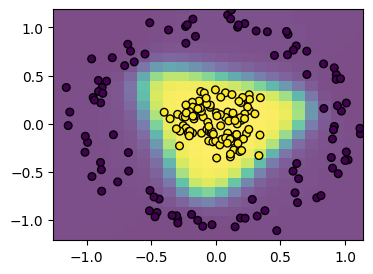

In [15]:
# Datos para el fondo
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                         np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Crear el fondo
Z = Z.reshape(xx.shape)
plt.figure(figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, alpha=0.7)

# Puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Cambia la arquitectura de la red y las funciones de activación hasta obtener un mejor ajuste. Puedes probar esta página para visualizar las arquitecturas de las redes: <a href="https://playground.tensorflow.org/" target="_blank">https://playground.tensorflow.org/</a>
</div>